# Linear Regression
We will use all our learning so far, and do a linear regression demo.

1. Design the model (input, output size, forward pass)
2. Construct loss and optimizer
3. Build training loop:
  - forward pass: compute the prediction and loss
  - backward pass: calculate gradients
  - update weights


X range: -2.3015386968802827 2.1855754065331614
Y range: -199.97242326924055 180.83718766714117
Epoch 001: w = -0.798, b = 0.337, loss = 5861.38574219
Epoch 101: w = 11.375, b = 1.856, loss = 4349.52978516
Epoch 201: w = 21.759, b = 2.977, loss = 3253.73095703
Epoch 301: w = 30.618, b = 3.789, loss = 2458.63598633
Epoch 401: w = 38.178, b = 4.363, loss = 1881.14843750
Epoch 501: w = 44.631, b = 4.757, loss = 1461.32104492
Epoch 601: w = 50.140, b = 5.014, loss = 1155.85058594
Epoch 701: w = 54.843, b = 5.168, loss = 933.40979004
Epoch 801: w = 58.859, b = 5.247, loss = 771.31268311
Epoch 901: w = 62.290, b = 5.270, loss = 653.10833740


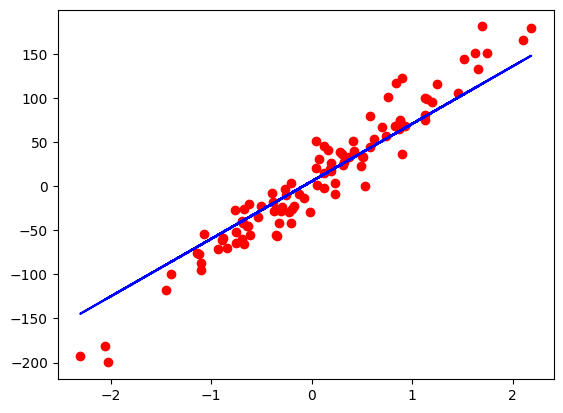

R²: 0.900, MAE: 18.104


In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# 0️⃣ Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
print("X range:", X_numpy.min(), X_numpy.max())
print("Y range:", y_numpy.min(), y_numpy.max())

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)  # reshape for (n_samples, 1)

n_samples, n_features = X.shape

# 1️⃣ Design model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2️⃣ Define loss and optimizer
criterion = nn.MSELoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# ⚙️ 3️⃣ Training loop
epochs = 1000
for epoch in range(epochs):
    # forward pass
    y_predicted = model(X)
    loss = criterion(y, y_predicted)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    # reset gradients
    optimizer.zero_grad()

    if epoch % 100 == 0:
        [w, b] = model.parameters()
        print(f"Epoch {epoch+1:03d}: w = {w[0][0].item():.3f}, b = {b.item():.3f}, loss = {loss.item():.8f}")

# 4️⃣ Plot result
predicted = model(X).detach().numpy()  # detach from computation graph
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# Score
predicted = model(X).detach().numpy()
r2 = r2_score(y_numpy, predicted)
mae = mean_absolute_error(y_numpy, predicted)
print(f"R²: {r2:.3f}, MAE: {mae:.3f}")
# R² tells how % variance explained. >0.9 is good
# MAE ≈ 18 → your model is basically within the expected noise range, which is realistic.

## Key takeaway

Even if the MSE looks large, your model is good enough as long as:
  - R² is close to 1
  - MAE is comparable to the noise in the data (we have added 20% noise, and MAE is 18% which is less than noise)